In [1]:
import matplotlib.pyplot as plt
import tensorflow.keras as keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import numpy as np
#Transfering data to GPU memory will take time and we only do it, if we really need to use GPU
import os
os.environ["CUDA_VISIBLE_DEVICES"] = "-1"

In [2]:
cifar10 = keras.datasets.cifar10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [3]:
x_train = x_train.reshape(x_train.shape[0],-1) #reshape 2D image into a 1D vector
x_test = x_test.reshape(x_test.shape[0], -1) #reshape 2D image into a 1D vector
##
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

In [4]:
#normalizing the input vectors
mean = np.mean(x_train)
std = np.std(x_train)
x_train = (x_train-mean)/(std+1e-7)
x_test = (x_test-mean)/(std+1e-7)

In [5]:
no_classes = 10

In [6]:
#change the output to one-hot vectors
y_train = keras.utils.to_categorical(y_train, no_classes)
y_test = keras.utils.to_categorical(y_test, no_classes)

In [7]:
def create_model(shape_of_input, no_classes, no_hidden_layers=0, no_units_per_layer=50):
    model = Sequential()
    if (no_hidden_layers == 0):
        model.add(Dense(no_classes, input_shape = shape_of_input, name='output_layer', activation='softmax'))
        return model
    model.add(Dense(no_units_per_layer, input_shape = shape_of_input,  activation='relu'))
    for i in range(no_hidden_layers-1):
        model.add(Dense(no_units_per_layer, activation='relu'))
    model.add(Dense(no_classes, name='output_layer', activation='softmax'))
    return model

In [8]:
import time

neurons_per_layer = [20,50,80,100,150,200] 
no_epochs = 10
x = np.arange(6)
y_train_error_list = []
y_test_error_list = []
training_time_list = []
inference_time_list = []
for i in neurons_per_layer:
    y_train_error = []
    training_time = []
    y_test_error = []
    inference_time = []
    for j in x:
        model = create_model((x_train.shape[1],), no_classes, j, i)
        model.summary()
        model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
        print('%d neurons per layer' % i)
        print('%d hidden layers' % j)
        start = time.time()
#         model.fit(x_train, y_train, epochs=10, batch_size=128, verbose=1, validation_data=(x_test, y_test))
        model.fit(x_train, y_train, epochs=no_epochs, batch_size=128, verbose=1)
        end = time.time()
        training_time.append((end - start)/no_epochs)
        #train error
        _, train_accuracy = model.evaluate(x_train, y_train)
        train_error = (1 - train_accuracy)*100
        y_train_error.append(train_error)
        #test_error
        start = time.time()
        _, test_accuracy = model.evaluate(x_test, y_test)
        end = time.time()
        inference_time.append(end - start)
        ##
        test_error = (1 - test_accuracy)*100
        y_test_error.append(test_error)
    y_train_error_list.append(y_train_error)
    y_test_error_list.append(y_test_error)
    training_time_list.append(training_time)
    inference_time_list.append(inference_time)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
output_layer (Dense)         (None, 10)                30730     
Total params: 30,730
Trainable params: 30,730
Non-trainable params: 0
_________________________________________________________________
20 neurons per layer
0 hidden layers
Epoch 1/10
391/391 [==============================] - 1s 2ms/step - loss: 1.9479 - accuracy: 0.3429
Epoch 2/10
391/391 [==============================] - 1s 2ms/step - loss: 1.8506 - accuracy: 0.3725
Epoch 3/10
391/391 [==============================] - 1s 2ms/step - loss: 1.8225 - accuracy: 0.3821
Epoch 4/10
391/391 [==============================] - 1s 2ms/step - loss: 1.8050 - accuracy: 0.3884
Epoch 5/10
391/391 [==============================] - 1s 2ms/step - loss: 1.7914 - accuracy: 0.3931
Epoch 6/10
391/391 [==============================] - 1s 2ms/step - loss: 1.7858 - accuracy: 0.3964
Epoch 7/1

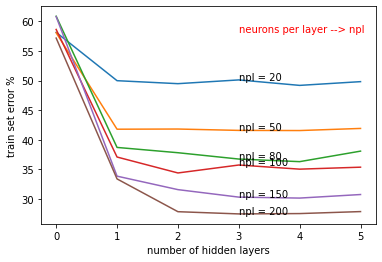

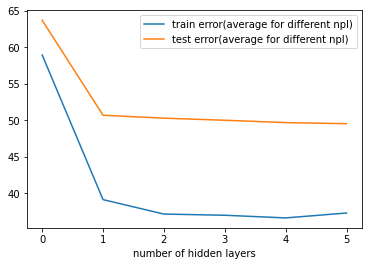

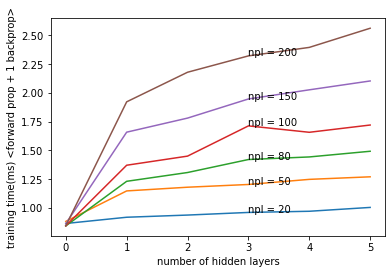

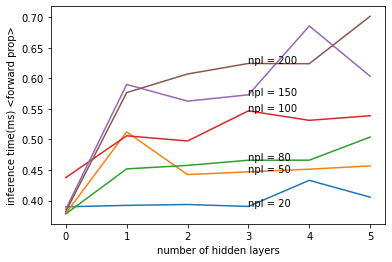

In [9]:
plt.xlabel("number of hidden layers")
plt.ylabel('train set error %')
########plot 1
n = len(neurons_per_layer)
for i in range(n):
    plt.plot(x, y_train_error_list[i])
    plt.text(x[3], y_train_error_list[i][3], f'npl = {neurons_per_layer[i]}')
plt.text(3,y_train_error_list[0][0],'neurons per layer --> npl', c='r')
########plot 2
mean_train_errors = np.mean(y_train_error_list, axis=0)
mean_test_errors = np.mean(y_test_error_list, axis=0)
plt.figure()
plt.xlabel("number of hidden layers")
plt.plot(x, mean_train_errors, label='train error(average for different npl)')
plt.plot(x, mean_test_errors, label='test error(average for different npl)')
plt.legend()
########plot 3 (training time)
plt.figure()
n = len(neurons_per_layer)
plt.xlabel("number of hidden layers")
plt.ylabel("training time(ms) <forward prop + 1 backprop>")
for i in range(n):
    plt.plot(x, training_time_list[i])
    plt.text(x[3], training_time_list[i][3], f'npl = {neurons_per_layer[i]}')
########plot 4 (inference time)
plt.figure()
n = len(neurons_per_layer)
plt.xlabel("number of hidden layers")
plt.ylabel("inference time(ms) <forward prop>")
for i in range(n):
    plt.plot(x, inference_time_list[i])
    plt.text(x[3], inference_time_list[i][3], f'npl = {neurons_per_layer[i]}')

In [10]:
# f = open('no_hidden_layers___test_set_error_v2.txt', 'w')

# f.write('number of hidden layers, train error, test error\n')
# for i in range(len(x)):
#     f.write('{}, {}, {}'.format(x[i], y_train_error[i], y_test_error[i]))
#     f.write('\n')

# f.close()